Problem Statement 1:
There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.
Business Objectives:
You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables. 
 They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
 Also build the Random Forest Regressor for optimal search of classifiers.
Dataset: data1.csv
Note : kindly build the project with following pointers
		1.Data understanding and exploration
		2.Data cleaning
		3.Data preparation
		4.Model building and evaluation
		5.Result with error calculation


In [72]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df=pd.read_csv("car.csv")
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [ ]:
#checking number of rows and columns in dataset
df.shape

(301, 9)

#Datatype

In [ ]:
#checking datatype of dataset, null values in it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#it looks like there are no null values in dataset

#null values

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

It states that there are no null values in dataset

#Describe

In [ ]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

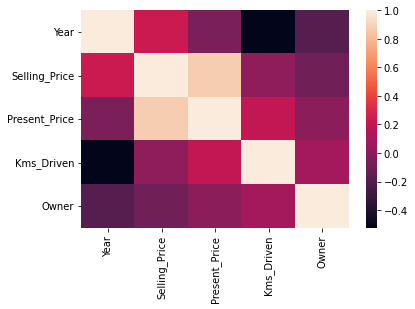

In [ ]:
sns.heatmap(df.corr())

#continues Variables


In [ ]:
df.describe().columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [ ]:
# will check colinearity between contunues variables
df.corr()

Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000

###if we consider Selling_Price as main parametre we see it show strong corrilation with Present_Price with Corrilation coiffeecient as 0.878983

#Catogarical Varialbels

In [ ]:
df.describe(include='O').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

#Car_Name

In [ ]:
df['Car_Name'].value_counts(normalize=True)

city                        0.086379
corolla altis               0.053156
verna                       0.046512
fortuner                    0.036545
brio                        0.033223
                              ...   
Honda CB Trigger            0.003322
Yamaha FZ S                 0.003322
Bajaj Pulsar 135 LS         0.003322
Activa 4g                   0.003322
Bajaj Avenger Street 220    0.003322
Name: Car_Name, Length: 98, dtype: float64

#Fuel_Type

In [ ]:
#checning unique vales and its counts
df['Fuel_Type'].value_counts(normalize=True)

Petrol    0.794020
Diesel    0.199336
CNG       0.006645
Name: Fuel_Type, dtype: float64

In [ ]:
a=df['Fuel_Type'].value_counts()

([<matplotlib.patches.Wedge at 0x7fbf9fc5a5e0>,
 [Text(-0.8776154230777207, 0.6631675272328356, 'Petrol'),
  Text(0.8635820276996969, -0.6813413839141726, 'Diesel'),
  Text(1.0997603522251278, -0.022960132265800064, 'CNG')])

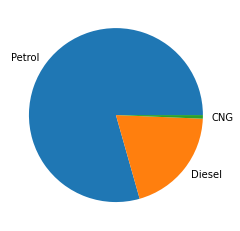

In [ ]:
plt.pie(x=a,labels=a.index)

Most of Cars of fule type (Petrol)

#Seller_Type

In [ ]:
#checning unique vales and its counts of Seller_Type
df['Seller_Type'].value_counts(normalize=True)

Dealer        0.647841
Individual    0.352159
Name: Seller_Type, dtype: float64

In [ ]:
b=df['Seller_Type'].value_counts()

([<matplotlib.patches.Wedge at 0x7fbf9dd78fd0>,
 [Text(-0.4927289809533005, 0.9834724964780268, 'Dealer'),
  Text(0.49272907303263863, -0.9834724503454059, 'Individual')])

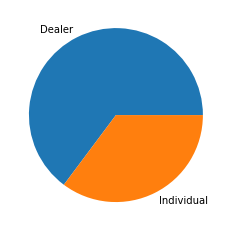

In [ ]:
plt.pie(x=b,labels=b.index)

#Seller type id Dealer here more than Individual

#*Transmission*

In [ ]:
#checning unique vales and its counts of Transmission
df['Transmission'].value_counts(normalize=True)

Manual       0.86711
Automatic    0.13289
Name: Transmission, dtype: float64

In [ ]:
c=df['Transmission'].value_counts()

([<matplotlib.patches.Wedge at 0x7fbf9dcde160>,
 [Text(-1.0055216878866322, 0.44601136217547, 'Manual'),
  Text(1.0055217087659298, -0.4460113151036022, 'Automatic')])

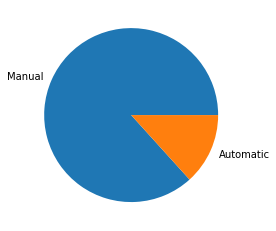

In [ ]:
plt.pie(x=c,labels=c.index)

##Car Transmission type sold more is Manual than Automatic

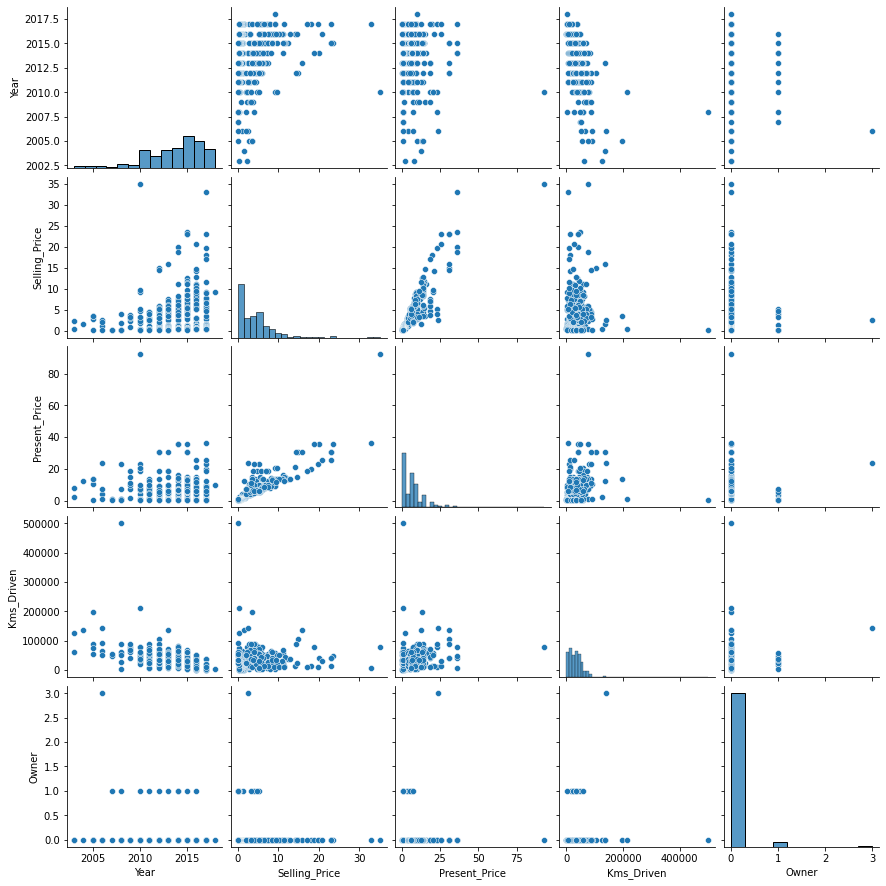

In [ ]:
sns.pairplot(df)

In [ ]:
#Will drop year and car_name as we are not going with individual car
new_df=df.drop(["Car_Name",	"Year"], axis=1)

#3.Data preparation

In [ ]:
new_df.head(10)

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   
5           9.25           9.83        2071    Diesel      Dealer   
6           6.75           8.12       18796    Petrol      Dealer   
7           6.50           8.61       33429    Diesel      Dealer   
8           8.75           8.89       20273    Diesel      Dealer   
9           7.45           8.92       42367    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0  
5       Manual      0  
6       Manual      0  
7       Manual      0  
8       Manual      0  
9       Manual      0

In [ ]:
#will apply data standerdization on continues data columns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_df[['Selling_Price','Present_Price','Kms_Driven']]=sc.fit_transform(new_df[['Selling_Price','Present_Price','Kms_Driven']])

In [ ]:
dummies=pd.get_dummies(new_df.select_dtypes(include=['object']),drop_first=True)


ValueError: ignored

In [ ]:
#Getting cleaned data
new_df=df.drop(df.select_dtypes(include=['object']).columns,axis=1)

In [ ]:
new_df=pd.concat([new_df,dummies],axis=1)

In [ ]:
new_df

Year  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0    2014      -0.258416      -0.236215   -0.256224      0                 0   
1    2013       0.017481       0.221505    0.155911      0                 1   
2    2017       0.510154       0.257427   -0.773969      0                 0   
3    2011      -0.356950      -0.403079   -0.817758      0                 0   
4    2014      -0.012079      -0.087890    0.141743      0                 1   
..    ...            ...            ...         ...    ...               ...   
296  2016       0.953559       0.460214   -0.076225      0                 1   
297  2015      -0.130321      -0.200292    0.593804      0                 0   
298  2009      -0.258416       0.390687    1.313340      0                 0   
299  2017       1.347698       0.564504   -0.719876      0                 1   
300  2016       0.125869      -0.200292   -0.810958      0                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2                   1                       0                    1  
3                   1                       0                    1  
4                   0                       0                    1  
..                ...                     ...                  ...  
296                 0                       0                    1  
297                 1                       0                    1  
298                 1                       0                    1  
299                 0                       0                    1  
300                 1                       0                    1  

[301 rows x 9 columns]

In [70]:
X=new_df.drop(['Selling_Price'],axis=1)
y=new_df['Selling_Price']

In [71]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_grid=[n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None]

rf=RandomForestRegressor()


In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distribution=random_grid)

In [ ]:
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.absolute_squared_error(y_test))
print(metrics.mean_squared_error(y_test))
print(np.sqrt(metrics.mean_squared_error(y_test)))